# Simulate data

In [97]:
import random
import numpy as np
rangeX = (-50, 50)
rangeY = (-2500, 2500)
#X=[]
#Y=[]
positive=0
negative=0
sample=[]
target=[]
for i in range(1000):
    x = random.randrange(*rangeX)
    #X.append(x)
    y = random.randrange(*rangeY)
    #Y.append(y)
    if y>=x**2:
        sample.append((x,y))
        target.append(1)
        positive+=1
    else:
        sample.append((x,y))
        target.append(0)
        negative+=1
#sample_array=np.array(sample)
#print sample,target,positive,negative

# Split train and test

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(sample, target, test_size=0.3, random_state=0)

# Use cross validation to find the optimal parameter

In [98]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
r=np.logspace(-5,5,num=20)
h=np.arange(10)
best_score=0
for a in r:
    for b in h:
        clf = MLPClassifier(solver='lbfgs', alpha=a,hidden_layer_sizes=(b+1,), random_state=1)
        clf.fit(X_train,y_train)
        scores = cross_val_score(clf, X_train,y_train, scoring='accuracy',cv=5)
        score_mean=max(scores)
        if score_mean>=best_score:
            best_score=score_mean
            best_alpha=a
            best_hidden=b+1
        #print a, b+1, best_hidden
print 'the optimal alpha is:',best_alpha
print 'the optimal number of hidden layer is:',best_hidden   

the optimal alpha is: 233.572146909
the optimal number of hidden layer is: 8


# Evaluate final neural network on test data

In [96]:
clf = MLPClassifier(solver='lbfgs', alpha=233.572146909,hidden_layer_sizes=(8,), random_state=1)
clf.fit(X_train,y_train)
prediction=clf.predict(X_test)
err=0
for i in range(len(prediction)):
    if prediction[i]!=y_test[i]:
        err+=1
print  "the accuracy is:",1-float(err)/len(y_test)

the accuracy is: 0.95


# find out the posicitve prediction

In [91]:
pre_positive_x=[]
pre_positive_y=[]
for i in range(len(prediction)):
    if prediction[i]==1:   
        pre_positive_x.append(X_test[i][0])
        pre_positive_y.append(X_test[i][1])

# Show the linear boundary

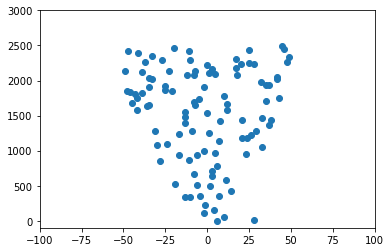

In [94]:
#pre_positive_array=np.array(pre_positive)
import matplotlib.pyplot as plt
plt.scatter(pre_positive_x,pre_positive_y)
plt.xlim(-100,100)
plt.ylim(-100,3000)
plt.show()